In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import integrate

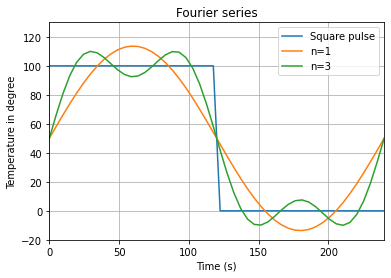

In [11]:
def square(t):
    A = 50
    tau = 240
    return A*signal.square(2 * np.pi * t/tau)+50    

def T_n1(t):
    T_1 = 50 + (200 / np.pi) * np.sin(np.pi * t /120)
    return T_1

def T_n3(t):
    T_3 = 50 + (200 / np.pi) * np.sin(np.pi * t /120) + (200 /(3 * np.pi)) * np.sin(np.pi * t /40)
    return T_3
    
t = np.linspace(0,240)
plt.xlim(0,240)
plt.ylim(-20,130)
plt.plot(t,square(t),label="Square pulse")
plt.plot(t,T_n1(t),label="n=1")
plt.plot(t,T_n3(t),label="n=3")
plt.xlabel("Time (s)")
plt.ylabel("Temperature in degree")
plt.title("Fourier series")
plt.legend()
plt.grid()
plt.show()

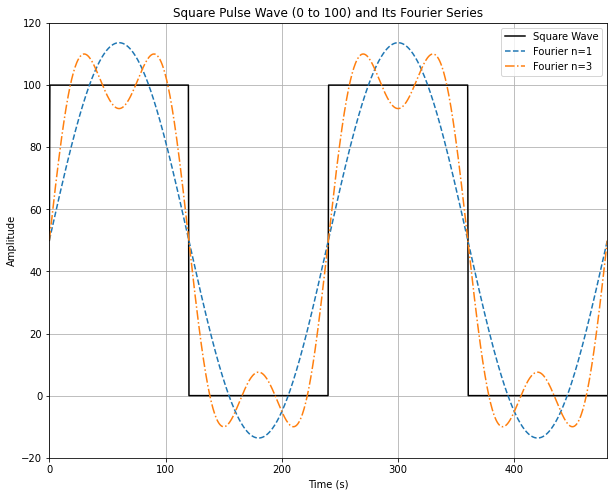

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_series_square_wave(t, terms=10, period=240):
    '''Compute Fourier series representation of a square wave'''
    sum = 0
    for n in range(1, terms * 2, 2):
        sum += (1/n) * np.sin(2 * np.pi * n * t / period)
    return 50 + 50 * (4/np.pi) * sum

# Generate time values
t = np.linspace(0, 2 * 240, 1000)  # Covering 2 periods

# Compute square wave values
square_wave = 100 * (0.5 + 0.5 * np.sign(np.sin(2 * np.pi * t / 240)))

# Compute Fourier series for various terms
fourier_1_terms = fourier_series_square_wave(t, terms=1)
fourier_3_terms = fourier_series_square_wave(t, terms=2)

# Plotting
plt.figure(figsize=(10,8))
plt.xlim(0,480)
plt.title('Square Pulse Wave (0 to 100) and Its Fourier Series')
plt.plot(t, square_wave, label='Square Wave', color='black')
plt.plot(t, fourier_1_terms, label='Fourier n=1', linestyle='dashed')
plt.plot(t, fourier_3_terms, label='Fourier n=3', linestyle='dashdot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import ipywidgets as widgets
from IPython.display import display

def fourier_series_square_wave(t, terms=10, period=240):
    sum = 0
    for n in range(1, terms * 2, 2):
        sum += (1/n) * np.sin(2 * np.pi * n * t / period)
    return 50 + (200/np.pi) * sum

def plot_with_terms(terms=10):
    t = np.linspace(0, 2 * 240, 1000)
    square_wave = 100 * (0.5 + 0.5 * np.sign(np.sin(2 * np.pi * t / 240)))
    fourier_approx = fourier_series_square_wave(t, terms)
    
    plt.figure(figsize=(10,8))
    plt.xlim(0,480)
    plt.ylim(-20,120)
    plt.title('Square Pulse Wave (0 to 100) and Its Fourier Series'f' (n={terms*2-1})')
    plt.plot(t, square_wave, label='Square Wave', color='black')
    plt.plot(t, fourier_approx, label=f'Fourier (n={terms*2-1})', linestyle='dashed')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# Display the interactive slider
widgets.interactive(plot_with_terms, terms=widgets.IntSlider(min=1, max=5, step=1, value=10))


interactive(children=(IntSlider(value=5, description='terms', max=5, min=1), Output()), _dom_classes=('widget-…

Numerical integration result: 1.5522591629999998
Error of the result: 0.018537163794896783


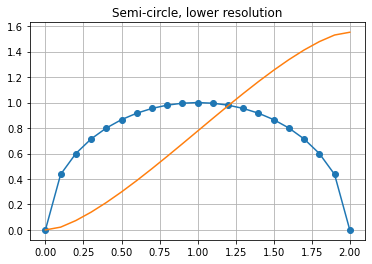

In [7]:
x1, y1 = np.loadtxt("/Users/liuhaoyun/Desktop/Uni/Year_2/Year_2_Lab/Year_2_lab_waves/Task1.3_Semicircle_low.txt", unpack = True, skiprows = 1)
plt.plot(x1,y1,'o-')
y1_int = integrate.cumtrapz(y1,x1,initial = 0)
plt.plot(x1,y1_int)
print("Numerical integration result:", y1_int[-1])
print("Error of the result:", np.pi/2 - y1_int[-1])
plt.title('Semi-circle, lower resolution')
plt.grid()
plt.show()

Numerical integration result: 1.5702085159199997
Error of the result: 0.0005878108748968991


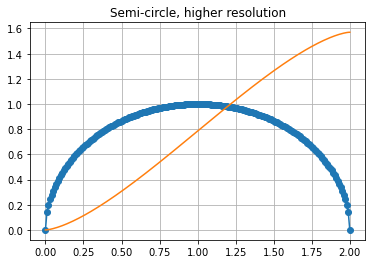

In [8]:
x2, y2 = np.loadtxt("/Users/liuhaoyun/Desktop/Uni/Year_2/Year_2_Lab/Year_2_lab_waves/Task1.3_Semicircle_high.txt", unpack = True, skiprows = 1)
plt.plot(x2,y2,'o-')
y2_int = integrate.cumtrapz(y2,x2,initial = 0)
plt.plot(x2,y2_int)
plt.title('Semi-circle, higher resolution')
print("Numerical integration result:", y2_int[-1])
print("Error of the result:", np.pi/2 - y2_int[-1])
plt.grid()
plt.show()

Numerical integration result: -9.481998519689228e-15
Error of the result: 9.481998519689228e-15


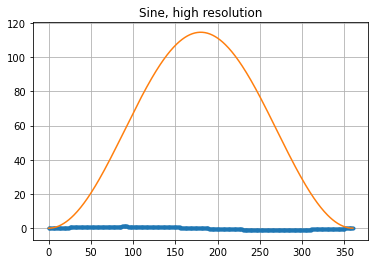

In [9]:
x3,y3 = np.loadtxt("/Users/liuhaoyun/Desktop/Uni/Year_2/Year_2_Lab/Year_2_lab_waves/Task1.3_Sine_high.txt", unpack =True, skiprows = 1)
plt.plot(x3,y3,".-")
y3_int = integrate.cumtrapz(y3,x3,initial = 0)
print("Numerical integration result:", y3_int[-1])
print("Error of the result:", 0 - y3_int[-1])
plt.title("Sine, high resolution")
plt.plot(x3,y3_int)
plt.grid()
plt.show()

Numerical integration result: -1.6431300764452317e-14
Error of the result 1.6431300764452317e-14


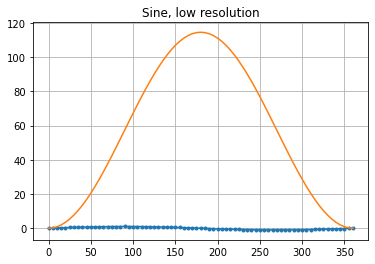

In [10]:
x4,y4 = np.loadtxt('/Users/liuhaoyun/Desktop/Uni/Year_2/Year_2_Lab/Year_2_lab_waves/Task1.3_Sine_low.txt', unpack = True, skiprows = 1)
y4_int = integrate.cumtrapz(y4,x4,initial = 0)
print("Numerical integration result:", y4_int[-1])
print("Error of the result", 0 - y4_int[-1])
plt.title("Sine, low resolution")
plt.plot(x4,y4,".-")
plt.plot(x4,y4_int)
plt.grid()
plt.show()